# Modeling via Python
## Numerical solution of the problem
#### 1. Simulation of the evolution of an epidemic by the SIR model
We start by importing the python libraries that we will use later...

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pickle

#### We now model an epidemic using a SIR model: 
We start by putting the partial differential equations presented earlier into function form:

In [22]:
def f(y,beta,lambd):
    (S,I,R) = y[:,0]
    x = np.array([[-beta*I*S], [beta*I*S - I/lambd], [I/lambd]])
    return x

We display the different functions using matplot :

In [23]:
def schema_num(methode,I0,t0,T,n,beta,Lambda,S_state,I_state,R_state):
    """ Program returning a matrix including the iterated values of S, I and R 
    according to the chosen method, for t ranging from t0 to T"""
    
    h = (T-t0)/n
    values = np.array([[1.0-I0],[I0],[0]])
    y = np.array([[1.0-I0],[I0],[0]])
    
    for k in range(n-1):
        if methode == "Euler":
            y = y + h*f(y,beta,Lambda)
        if methode == "modified Euler":
            y = y + h*f(y+h/2*f(y,beta,Lambda),beta,Lambda)
        if methode == "Runge Kutta 2nd order":
            y = y + h/2*(f(y,beta,Lambda)+f(y+h*f(y,beta,Lambda),beta,Lambda))
        if methode == "Runge Kutta 4th order":
            k1 = f(y,beta,Lambda)
            k2 = f(y + h/2*k1,beta,Lambda)
            k3 = f(y + h/2*k2,beta,Lambda)
            k4 = f(y + h*k3,beta,Lambda)
            y = y + h/6*(k1+2*k2+2*k3+k4)
        values = np.append(values,y,1)
        
    fig = plt.figure()
    fig.set_size_inches(16, 8, forward=True)    
    t = np.linspace(t0,T,n)
    plt.xlim(xmin=0,xmax=T)
    
    if S_state:
        plt.plot(t, values[0], label='S', c='b')
    if I_state:
        plt.plot(t, values[1], label='I', c='orange')
    if R_state:
        plt.plot(t, values[2], label='R', c='g')
    plt.title("Plotting the SIR model with the "+ methode+" method" ,fontsize=16)
    plt.legend()
    plt.show()

widgets.interact(schema_num, 
                 Lambda = widgets.FloatSlider(value=5.0,min=0.2,max=30.0,step=0.2), 
                 beta = widgets.FloatSlider(value=0.5,min=0.01,max=1.0,step=0.01), 
                 I0 = widgets.FloatSlider(value=0.1,min=0.0,max=1.0,step=0.01), 
                 n=widgets.IntSlider(value=200,min=20,max=1000,step=10),
                 methode = ['Euler','modified Euler',"Runge Kutta 2nd order","Runge Kutta 4th order"],
                 t0=widgets.fixed(0),
                 T=widgets.IntSlider(value=50,min=30,max=100,step=10),
                 S_state = widgets.Checkbox(value=True,description='S'),
                 I_state = widgets.Checkbox(value=True,description='I'),
                 R_state = widgets.Checkbox(value=True,description='R'));

interactive(children=(Dropdown(description='methode', options=('Euler', 'modified Euler', 'Runge Kutta 2nd ord…

## Convergence study
### We will study the convergence of our numerical methods in comparison with RK4, which we consider as exact

After plotting RK4 as our exact solution, we graphically compare the other methods to RK4. We can easily notice that when the number of points (n) increases, the curves of the other methods tend towards that of RK4.

In [5]:
def schema_num2(method,I0,t0,T,n,beta,Lambda,S_state,I_state,R_state):
    """ Program returning a matrix including the iterated values of S, I and R 
    according to the chosen method, for t ranging from t0 to T"""
    
    h = (T-t0)/n
    values = np.array([[1.0-I0],[I0],[0]])
    y = np.array([[1.0-I0],[I0],[0]])
    
    for k in range(n-1):
        if method == "Euler":
            y = y + h*f(y,beta,Lambda)
        if method == "modified Euler":
            y = y + h*f(y+h/2*f(y,beta,Lambda),beta,Lambda)
        if method == "Runge Kutta 2nd order":
            y = y + h/2*(f(y,beta,Lambda)+f(y+h*f(y,beta,Lambda),beta,Lambda))
        values = np.append(values,y,1)
        
    fig = plt.figure()
    fig.set_size_inches(16, 8, forward=True)    
    t = np.linspace(t0,T,n)
    plt.xlim(xmin=0,xmax=T)
    
    if S_state:
        plt.plot(t, values[0], '--', label='S', color = 'b')
    if I_state:
        plt.plot(t, values[1], '--', label='I', color = 'orange')
    if R_state:
        plt.plot(t, values[2], '--', label='R', color = 'g')
    
    
    ##########
    # RK4 plot
    
    n_2 = 1000
    h_2 = (T-t0)/n_2
    values_2 = np.array([[1.0-I0],[I0],[0]])
    y_2 = np.array([[1.0-I0],[I0],[0]])
    
    for k in range(n_2-1):
        k1 = f(y_2,beta,Lambda)
        k2 = f(y_2 + h_2/2*k1,beta,Lambda)
        k3 = f(y_2 + h_2/2*k2,beta,Lambda)
        k4 = f(y_2 + h_2*k3,beta,Lambda)
        y_2 = y_2 + h_2/6*(k1+2*k2+2*k3+k4)
        values_2 = np.append(values_2,y_2,1)
    
    t_2 = np.linspace(t0,T,n_2)

    plt.plot(t_2, values_2[0], label='exact S', color = 'c')
    plt.plot(t_2, values_2[1], label='exact I', color = 'red')
    plt.plot(t_2, values_2[2], label='exact R', color = 'lime')
    
    
    plt.title("Comparison of the " + method + " method with the RK4 method", fontsize=16)
    plt.legend()
    plt.show()

widgets.interact(schema_num2, 
                 Lambda = widgets.FloatSlider(value=5.0,min=0.2,max=30.0,step=0.2), 
                 beta = widgets.FloatSlider(value=0.5,min=0.01,max=1.0,step=0.01), 
                 I0 = widgets.FloatSlider(value=0.1,min=0.0,max=1.0,step=0.01), 
                 n=widgets.IntSlider(value=100,min=20,max=1000,step=10),
                 method = ['Euler','modified Euler',"Runge Kutta 2nd order"],
                 t0=widgets.fixed(0),
                 T=widgets.IntSlider(value=50,min=30,max=100,step=10),           
                 S_state = widgets.Checkbox(value=True,description='S'),
                 I_state = widgets.Checkbox(value=True,description='I'),
                 R_state = widgets.Checkbox(value=True,description='R'));

interactive(children=(Dropdown(description='method', options=('Euler', 'modified Euler', 'Runge Kutta 2nd orde…

## Errors display
### We now display the difference between the (supposed exact) RK4 method and an other one.

The errors are in absolute values. You can choose the method to be compared (Euler, modified Euler and RK2) and the step used (1, 0.5 , 0.25). It is particularly interesting to note that when we divide the step by 2 for the Euler method (respectively modified Euler and RK2) the maximum error is divided by 2 (respectively 4).
This is characteristic of an order of convergence of 1 (respectively 2).
It confirms our choice of RK4 as the exact solution.

In [ ]:
def schema_errors(method,I0,t0,T,n,beta,Lambda,step):
    """ Program returning a matrix including the iterated values of S, I and R 
    according to the chosen method, for t ranging from t0 to T"""
    
    if step == "1":
        T = 50
        t0 = 0
        n = 50
    if step == "0,5":
        T = 50
        t0 = 0
        n = 100
    if step == "0,25":
        T = 50
        t0 = 0
        n = 200
    
    n_2 = n*50
    h_2 = (T-t0)/n_2
    values_2 = np.array([[1.0-I0],[I0],[0]])
    y_2 = np.array([[1.0-I0],[I0],[0]])
    
    for k in range(n_2-1):
        k1 = f(y_2,beta,Lambda)
        k2 = f(y_2 + h_2/2*k1,beta,Lambda)
        k3 = f(y_2 + h_2/2*k2,beta,Lambda)
        k4 = f(y_2 + h_2*k3,beta,Lambda)
        y_2 = y_2 + h_2/6*(k1+2*k2+2*k3+k4)
        values_2 = np.append(values_2,y_2,1)
    
    
    h = (T-t0)/n
    values = np.array([[1.0-I0],[I0],[0]])
    y = np.array([[1.0-I0],[I0],[0]])
    
    for k in range(n-1):
        if method == "Euler":
            y = y + h*f(y,beta,Lambda)
        if method == "modified Euler":
            y = y + h*f(y+h/2*f(y,beta,Lambda),beta,Lambda)
        if method == "Runge Kutta 2nd order":
            y = y + h/2*(f(y,beta,Lambda)+f(y+h*f(y,beta,Lambda),beta,Lambda))
        values = np.append(values,y,1)
        
    ##########
    # RK4 plot
    
    S_errors = []
    I_errors = []
    R_errors = []
    for i in range(n):
        S_errors.append(abs(values[0][i] - values_2[0][i*50]))
        I_errors.append(abs(values[1][i] - values_2[1][i*50]))
        R_errors.append(abs(values[2][i] - values_2[2][i*50]))
    
    ##########
    # plotting
    
    fig = plt.figure()
    t = np.linspace(t0,T,n)
    fig.set_size_inches(16, 8, forward=True)
    plt.xlim(xmin=0,xmax=T)
    
    plt.plot(t, S_errors, '--', label='S error', color = 'b')
    plt.plot(t, I_errors, '--', label='I error', color = 'orange')
    plt.plot(t, R_errors, '--', label='R error', color = 'g')
    
        
    plt.title("Comparison of the " + method + " method with the RK4 method", fontsize=16)
    plt.legend()
    plt.show()

    

widgets.interact(schema_errors, 
                 Lambda = widgets.FloatSlider(value=5.0,min=0.2,max=30.0,step=0.2), 
                 beta = widgets.FloatSlider(value=0.5,min=0.01,max=1.0,step=0.01), 
                 I0 = widgets.FloatSlider(value=0.1,min=0.0,max=1.0,step=0.01), 
                 n=widgets.fixed(100),
                 method = ['Euler','modified Euler',"Runge Kutta 2nd order"],
                 t0=widgets.fixed(0),
                 T=widgets.fixed(50),
                 step = widgets.ToggleButtons(
                         options=['1', '0,5', '0,25'], 
                         description="Step choice : ",
                         tooltips=['Plotting the error with a step of 1','Plotting the error with a step of 0,5','Plotting the error with a step of 0,25']
                         )
                 );

interactive(children=(Dropdown(description='method', options=('Euler', 'modified Euler', 'Runge Kutta 2nd orde…

### Comparison of SIR model with some real data
To check whether our model fits reality, we found data from a measles epidemic that occurred in 1861 in Hagelloch, Germany. We experimentally found values for which a SIR model fits the data we found for this epidemic. The most important thing is to be able to estimate the date of the peak of the infection curve and as can be seen graphically, our model shows that it is therefore possible to estimate this date.

Source: https://www.researchgate.net/publication/318898909_Application_of_a_Second-order_Stochastic_Optimization_Algorithm_for_Fitting_Stochastic_Epidemiological_Models


In [6]:
def schema_num3(methode,I0,t0,T,n,beta,Lambda,S_state,I_state,R_state):
    """ Program returning a matrix including the iterated values of S, I and R 
    according to the chosen method, for t ranging from t0 to T"""
    
    h = (T-t0)/n
    values = np.array([[1.0-I0],[I0],[0]])
    y = np.array([[1.0-I0],[I0],[0]])
    
    for k in range(n-1):
        if methode == "Euler":
            y = y + h*f(y,beta,Lambda)
        if methode == "modified Euler":
            y = y + h*f(y+h/2*f(y,beta,Lambda),beta,Lambda)
        if methode == "Runge Kutta 2nd order":
            y = y + h/2*(f(y,beta,Lambda)+f(y+h*f(y,beta,Lambda),beta,Lambda))
        if methode == "Runge Kutta 4th order":
            k1 = f(y,beta,Lambda)
            k2 = f(y + h/2*k1,beta,Lambda)
            k3 = f(y + h/2*k2,beta,Lambda)
            k4 = f(y + h*k3,beta,Lambda)
            y = y + h/6*(k1+2*k2+2*k3+k4)
        values = np.append(values,y,1)
    t = np.linspace(t0,T,n)

    img = plt.imread("Measles_real_values.png") 

    plt.figure(figsize=(20, 7))
    plt.xlim(xmin=0,xmax=T)
    plt.imshow(img, extent=[0, 50, 0, 50])  
    if S_state:
        plt.plot(t, values[0]*50,":", label='S', c='g')
        plt.legend()
    if I_state:
        plt.plot(t, values[1]*50,":", label='I', c='r')
        plt.legend()
    if R_state:
        plt.plot(t, values[2]*50,":", label='R', c='b')
        plt.legend()
    plt.title("Comparison with real data, "+ methode+" method" ,fontsize=16)
    plt.show()

widgets.interact(schema_num3,
                 Lambda = widgets.FloatSlider(value=8,min=1,max=30,step=0.2), 
                 beta = widgets.FloatSlider(value=0.64,min=0.01,max=1.0,step=0.01), 
                 I0 = widgets.FloatSlider(value=0.01,min=0.01,max=1,step=0.01), 
                 n=widgets.IntSlider(value=200,min=20,max=1000,step=10),
                 methode = ['Euler','modified Euler',"Runge Kutta 2nd order","Runge Kutta 4th order"], 
                 t0 = widgets.FloatSlider(value=2.3,min=0,max=10,step=0.1),
                 T=widgets.IntSlider(value=50,min=30,max=100,step=10),
                 S_state = widgets.Checkbox(value=False,description='S'),
                 I_state = widgets.Checkbox(value=False,description='I'),
                 R_state = widgets.Checkbox(value=False,description='R'));

interactive(children=(Dropdown(description='methode', options=('Euler', 'modified Euler', 'Runge Kutta 2nd ord…

# Cells spacial simulation:
Here we simulate the spread of the epidemic using a very different approach.  
We represent each individual of the population by a cell. We then create a matrix containing these cells and we apply some simple rules:
- As for the sir model, each cell has three possible states: S, I & R.
- We place in the cellMap (the matrix of cells), a number of initially infected cells.
- At each 'tick', a healthy cell adjacent to an infected cell has a "CONTAGION" probability of being infected.
- At each 'tick' an infected cell has a probability of "RECOVER" to go from stage I (infected) to stage R (recovered).
- A recovered cell cannot be infected again.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw
import matplotlib.image as mpimg
import IPython.display

CONTAGION = 0.2 #20% of chances to infect adjacent cell
RECOVER = 0.05 #5% chance to recover

def decision(probability): #returns boolean probabilistically based
    return random.random() < probability

class Cell:
    def __init__(self,line, column, state):
        self.line = line
        self.column = column
        self.state = state #state 0: Susceptible, 1: Infectious, 2: Recoverd (SIR MODEL)

    def tick(self):
        print('cell at pos ' + str(self.line) + ',' + str(self.column) + ' Ticked !')
        if self.state == 1:
            self.infect()
            self.recover()
        return
    
    def infect(self):
        self.state = 1
        return
    
    def recover(self):
        self.state = 2
        return


class CellMap:
    def __init__(self,lines,columns):
        self.SIR = [0,0,0]
        self.createMap(lines,columns)
        self.lines = lines
        self.columns = columns


    
    def createMap(self,lines,columns):
        array = np.zeros((lines,columns))
        array = array.astype('object_') #allows to store any object, not only floats
        printableArray = np.zeros((lines,columns))
    
        for l in range(array.shape[0]):
            for c in range(array.shape[1]):
                array[l,c] = Cell(l,c,0)
                printableArray[l,c] = 0
        
        self.cellArray = array.copy()
        self.printableArray = printableArray.copy()
        self.SIR[0] = self.cellArray.shape[0]*self.cellArray.shape[1]


    def tick(self):
        nextCellArray = self.cellArray.copy()
        for l in range(self.cellArray.shape[0]):
            for c in range(self.cellArray.shape[1]):
                
                cell = self.cellArray[l,c]
                if cell.state == 1:
                    # print(str(l) + ',' + str(c))
                    for lAdjacent,cAdjacent in self.AdjacentCells(l,c):
                        # print(str(lAdjacent) + ',' + str(cAdjacent))
                        if decision(CONTAGION):
                            self.infectCell(lAdjacent,cAdjacent,nextCellArray)

                    if decision(RECOVER): #at term we will need to implement it as a normal map
                        self.recoverCell(l,c,nextCellArray)
        # print(self.SIR)

        
        self.cellArray = nextCellArray.copy()

    def infectCell(self,l,c,cellArray = None):
        if cellArray is None:
            cellArray = self.cellArray
        
        if cellArray[l,c].state ==0:
            cellArray[l,c].infect()
            self.printableArray[l,c] = 1  
            self.SIR[0] -= 1
            self.SIR[1] += 1        

    def recoverCell(self,l,c,cellArray = None):
        if cellArray is None:
            cellArray = self.cellArray
        cellArray[l,c].recover()
        self.printableArray[l,c] = 2    
        self.SIR[1] -= 1
        self.SIR[2] += 1                   

    def AdjacentCells(self,l,c):
        adjacentCells = []
        for lOffset in range(-1,2):
            for cOffset in range(-1,2):
                if l + lOffset in range(self.lines) and c + cOffset in range(self.columns) and (l + lOffset != l or c + cOffset != c):
                    adjacentCells.append((l+lOffset,c+cOffset))
        # adjacentCells = [(l-1,c-1),(l-1,c),(l-1,c+1),(l,c-1),(l,c+1),(l+1,c-1),(l+1,c),(l+1,c+1)]
        
        # print(adjacentCells)
        return adjacentCells
    
    def placeInitialInfected(self,numberOfInitialInfected):
        for i in range(numberOfInitialInfected):
            l = random.randrange(self.lines)
            c = random.randrange(self.columns)
            self.infectCell(l,c)




class Simulation:
    def __init__(self,cellMap):
        self.cellMap = cellMap
        self.steps = [[],[],[],[]] #each simulation steps [printableMatrixList],[SList],[IList],[RList]
        
        

    def plot(self):
        t = np.linspace(0,self.numberOfTicks +1 ,self.numberOfTicks +1)
        
        fig = plt.figure()
        fig.set_size_inches(16, 8, forward=True)
        plt.xlim(xmin=0,xmax=self.numberOfTicks+1)
        
        nb_cells = self.cellMap.lines*self.cellMap.columns
        
        SList = self.steps[1]
        IList = self.steps[2]
        RList = self.steps[3]
        
        for i in range(len(SList)):
            SList[i] = SList[i]/nb_cells
            IList[i] = IList[i]/nb_cells
            RList[i] = RList[i]/nb_cells
        
        plt.plot(t, SList, label='S')
        plt.plot(t, IList, label='I')
        plt.plot(t, RList, label='R')
        
        pickle.dump(fig, open('SIR.pickle_2','wb')) # Changed file name to _2 to prevent from overwriting the file with values of the small simultion my mistake
        
        return
    
    def run(self,numberOfTicks):
        self.numberOfTicks = numberOfTicks
        self.steps[0].append(self.cellMap.printableArray.copy())
        self.steps[1].append(self.cellMap.SIR[0])
        self.steps[2].append(self.cellMap.SIR[1])
        self.steps[3].append(self.cellMap.SIR[2])
        for i in range(numberOfTicks):
            self.cellMap.tick()
            self.steps[0].append(self.cellMap.printableArray.copy())
            self.steps[1].append(self.cellMap.SIR[0])
            self.steps[2].append(self.cellMap.SIR[1])
            self.steps[3].append(self.cellMap.SIR[2])
        return

    def generateGIF(self,path='cells.gif',duration = 200,width=1000,borderWidth = 1):
        images = []

        cellWidth = width // self.cellMap.lines

        def drawImage(printableCellArray):
            im = Image.new('RGB',(width,width))
            draw = ImageDraw.Draw(im)
            for l in range(printableCellArray.shape[0]):
                for c in range(printableCellArray.shape[1]):
                    color = 'black'
                    if printableCellArray[l,c] == 0:
                        color = 'blue'
                    elif printableCellArray[l,c] == 1:
                        color = 'orange'
                    elif printableCellArray[l,c] == 2:
                        color = 'green'
                    # draw.rectangle([cellWidth*(printableCellArray.shape[0] - l),cellWidth*c,cellWidth*(printableCellArray.shape[0] - l + 1),cellWidth*(c + 1)],color,'black',width=2)
                    draw.rectangle([cellWidth*c,cellWidth*(printableCellArray.shape[0] - l - 1),cellWidth*(c + 1),cellWidth*(printableCellArray.shape[0] - l)],color,'black',width=borderWidth)
            images.append(im)

        for step in self.steps[0]:
            drawImage(step)

        images[0].save(path,save_all=True, append_images=images[1:], optimize=True, duration=duration, loop=0)

## Simulation with few cells:
With few cells, although the graph looks a bit like a SIR simulation, it is still very far from it.

<IPython.core.display.Javascript object>


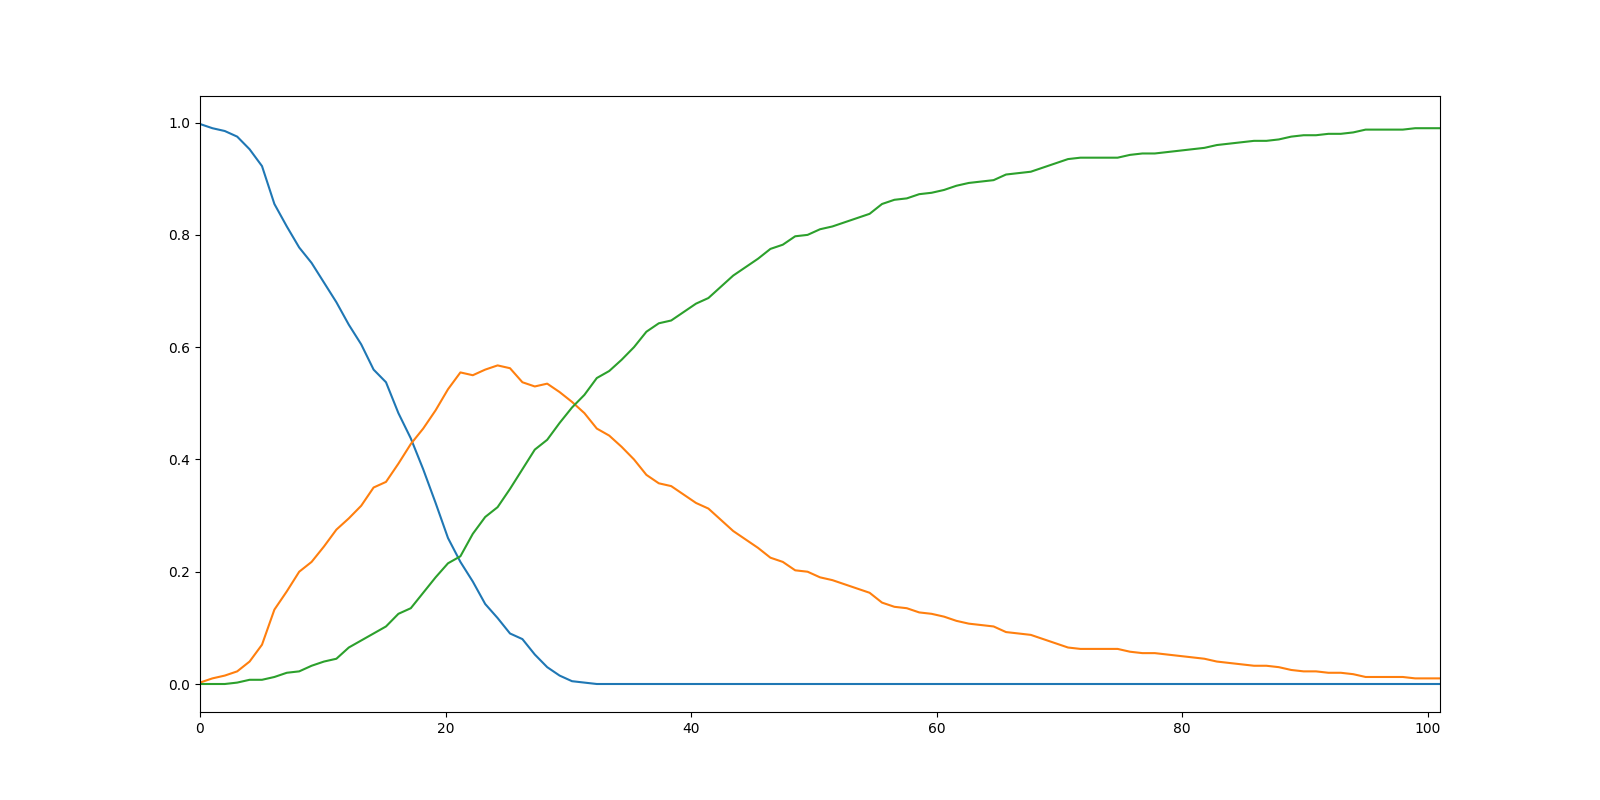

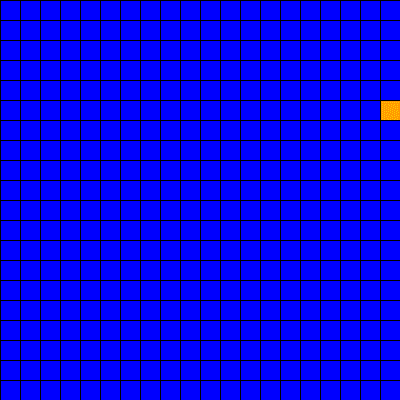

In [12]:
cellMap = CellMap(20,20) 
cellMap.placeInitialInfected(1)
simulation = Simulation(cellMap)
simulation.run(100)
simulation.generateGIF('cells1.gif',500,width= 400)
simulation.plot()
pil_img = IPython.display.Image(filename='cells1.gif')
display(pil_img)

## Simulation with much more cells :
with a lot more cells (250*250 = 62500), our graph looks very much like a SIR simulation,
also, the gif we get is quite monstrous.

In [15]:
#PARAMETERS:
map_width = 250
number_of_infected = 100
simulation_time = 100
CONTAGION = 0.2 
RECOVER = 0.1
number_of_cells = map_width **2

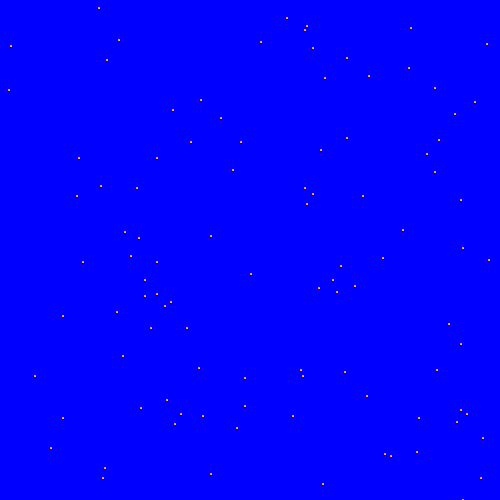

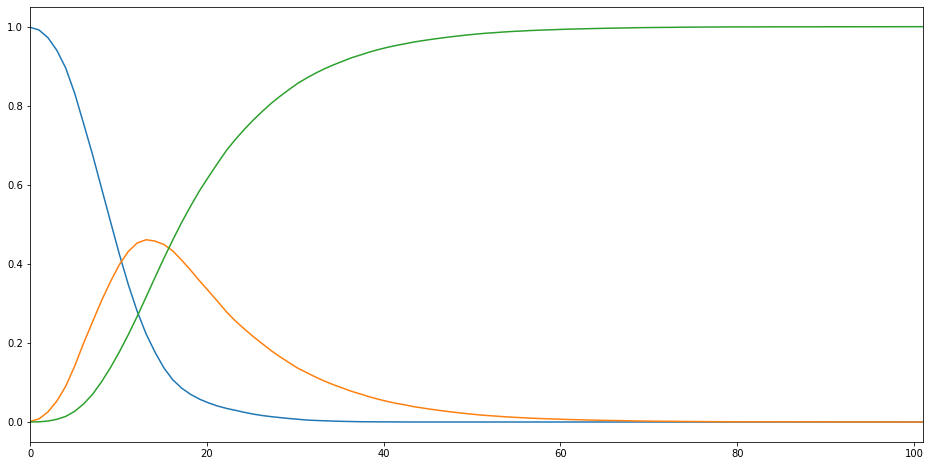

In [16]:
#CELLS SIMULATION: /!\ HERE THE CODE IS QUITE HEAVY TO RUN, AND COULD CRASH IN A BROWSER OR A LESS POWERFUL COMPUTER
cellMap = CellMap(map_width,map_width) 
cellMap.placeInitialInfected(number_of_infected)
simulation = Simulation(cellMap)
simulation.run(simulation_time)
simulation.generateGIF('cells2.gif',width=500,borderWidth = 0)

pil_img = IPython.display.Image(filename='cells2.gif')
display(pil_img)

simulation.plot()

## Comparaison with the SIR model:
### To be able to comparate we need to choose the wright parameters:

- We have Lambda = 1/RECOVER, because lambda is the average number of days and RECOVER the probability of recovery.
- I0, the proportion of initial infected is equal to the ratio of the number of initially infected cells to the number of total cells (I0 = number_of_infected / number_of_cells).
- The simulation time remains the same (T = simulation_time).
- For beta it is much more complicated, because the CONTAGION parameter reflects the probability that an infected cell infects an adjacent cell. But the parameter beta (of the SIR model) represents the probability that each infected individual infects a healthy individual. So here we set beta arbitrarily so that our two models fit, because we lacked time to calculate it.

### By setting our parameters as explained, we see that the SIR result is very close to the one obtained by the simulation with many cells :

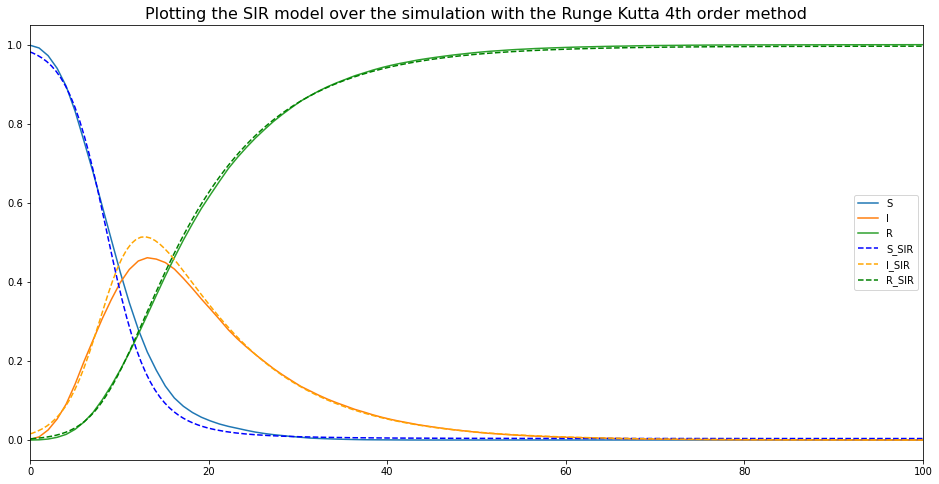

In [17]:
#SIR:
METHOD = "Runge Kutta 4th order"
I0 = number_of_infected / number_of_cells
t0 = -5
T = 100 
n = 200
beta = 2.8*CONTAGION #I could not figure out a mathematical relation between SIR's beta and cells RECOVER parameters, so I set this objectively to make the model fit.
Lambda = 1/RECOVER

def schema_num(methode,I0,t0,T,n,beta,Lambda):
    """ Program returning a matrix including the iterated values of S, I and R 
    according to the chosen method, for t ranging from t0 to T"""
    
    h = (T-t0)/n
    values = np.array([[1.0-I0],[I0],[0]])
    y = np.array([[1.0-I0],[I0],[0]])
    
    for k in range(n-1):
        if methode == "Runge Kutta 4th order":
            k1 = f(y,beta,Lambda)
            k2 = f(y + h/2*k1,beta,Lambda)
            k3 = f(y + h/2*k2,beta,Lambda)
            k4 = f(y + h*k3,beta,Lambda)
            y = y + h/6*(k1+2*k2+2*k3+k4)
        values = np.append(values,y,1)
    
    fig = pickle.load(open('SIR.pickle','rb')) 
    fig.set_size_inches(16, 8, forward=True)
    t = np.linspace(t0,T,n)
    plt.xlim(xmin=0,xmax=T)
    
    
    plt.plot(t, values[0], '--', label='S_SIR', c='b')
    plt.plot(t, values[1], '--', label='I_SIR', c='orange')
    plt.plot(t, values[2], '--', label='R_SIR', c='g')
    
    plt.title("Plotting the SIR model over the simulation with the "+ methode+" method" ,fontsize=16)
    plt.legend()

schema_num(METHOD, I0=I0, t0=t0, T=T, n=n, beta=beta, Lambda=Lambda)